$\newcommand{\re}{\mathbb{R}}$
# Stability of Gaussian elimination

In [10]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu

## Gaussian elimination with partial pivoting

The rows are swapped in the pivoting step and the decomposition is of the form

$$
P A = L U
$$

where $P$ is a permutation matrix.

Now we test on many random matrices. We will use scipy LU routine since it will be faster than our own implementation. **NOTE**: This can take some time to run.

In [11]:
sizes = np.ceil(10**np.linspace(np.log10(5),np.log10(1000),50))
nsamples = 100
mvalues, rhovalues = [], []

for m1 in sizes:
    m = int(m1)
    for r in range(nsamples):
        A = np.random.normal(0.0, np.sqrt(1.0/m), (m,m))
        P,L,U = lu(A)
        rho = np.abs(U).max() / np.abs(A).max()
        rhovalues.append(rho)
        mvalues.append(m)

Plot growth factor vs matrix size $m$.

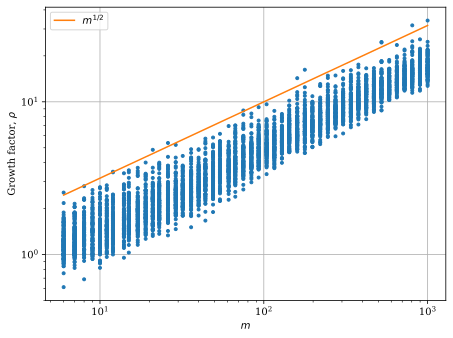

In [12]:
plt.loglog(mvalues, rhovalues, '.')
plt.loglog(mvalues, np.sqrt(mvalues), label='$m^{1/2}$')
plt.xlabel('$m$')
plt.ylabel('Growth factor, $\\rho$')
plt.legend()
plt.grid(True)

Compare this to Figure 22.1 from Trefethen and Bau.